<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge-Description" data-toc-modified-id="Challenge-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge Description</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Merging-dataset-&amp;-check-for-missing/abnormal-values" data-toc-modified-id="Merging-dataset-&amp;-check-for-missing/abnormal-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merging dataset &amp; check for missing/abnormal values</a></span><ul class="toc-item"><li><span><a href="#Merging-Dataset" data-toc-modified-id="Merging-Dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Merging Dataset</a></span></li><li><span><a href="#Cleaning-Merged-dataset:" data-toc-modified-id="Cleaning-Merged-dataset:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cleaning Merged dataset:</a></span><ul class="toc-item"><li><span><a href="#Converting-timestamp" data-toc-modified-id="Converting-timestamp-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Converting timestamp</a></span></li><li><span><a href="#Dropping-Country-Column" data-toc-modified-id="Dropping-Country-Column-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Dropping Country Column</a></span></li><li><span><a href="#Checking-test-and-price-column" data-toc-modified-id="Checking-test-and-price-column-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Checking test and price column</a></span></li></ul></li></ul></li><li><span><a href="#Checking-for-missing/abnormal-values-in-the-dataset" data-toc-modified-id="Checking-for-missing/abnormal-values-in-the-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checking for missing/abnormal values in the dataset</a></span></li><li><span><a href="#Check-for-high-level-test-results" data-toc-modified-id="Check-for-high-level-test-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check for high level test results</a></span></li><li><span><a href="#Exploratory-Analysis-for-Test-Results" data-toc-modified-id="Exploratory-Analysis-for-Test-Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploratory Analysis for Test Results</a></span><ul class="toc-item"><li><span><a href="#Conversion-Rate-breakdown-by-time-series" data-toc-modified-id="Conversion-Rate-breakdown-by-time-series-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Conversion Rate breakdown by time series</a></span></li><li><span><a href="#Conversion-Rate-breakdown-by-other-demographics" data-toc-modified-id="Conversion-Rate-breakdown-by-other-demographics-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Conversion Rate breakdown by other demographics</a></span><ul class="toc-item"><li><span><a href="#Categorical-Values" data-toc-modified-id="Categorical-Values-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Categorical Values</a></span></li><li><span><a href="#Numeric-Values" data-toc-modified-id="Numeric-Values-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Numeric Values</a></span></li></ul></li></ul></li><li><span><a href="#Build-a-model-to-predict-conversion-to-validate-our-findings" data-toc-modified-id="Build-a-model-to-predict-conversion-to-validate-our-findings-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Build a model to predict conversion to validate our findings</a></span><ul class="toc-item"><li><span><a href="#Initiate-H2O-instance" data-toc-modified-id="Initiate-H2O-instance-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Initiate H2O instance</a></span></li><li><span><a href="#Passing-data-in" data-toc-modified-id="Passing-data-in-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Passing data in</a></span></li><li><span><a href="#Test-Train-Split-&amp;-Train-Classifier" data-toc-modified-id="Test-Train-Split-&amp;-Train-Classifier-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Test Train Split &amp; Train Classifier</a></span></li><li><span><a href="#Model-Performance" data-toc-modified-id="Model-Performance-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Model Performance</a></span></li></ul></li><li><span><a href="#Recommendation-&amp;-Summary" data-toc-modified-id="Recommendation-&amp;-Summary-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Recommendation &amp; Summary</a></span></li></ul></div>

# Challenge Description

Company XYZ sells a software for 39 usd. Since revenue has been flat for some time, the VP of
Product has decided to run a test increasing the price. She hopes that this would increase
revenue. In the experiment, 66% of the users have seen the old price (39 usd), while a random
sample of 33% users a higher price (59 usd). <br>
The test has been running for some time and the VP of Product is interested in understanding
how it went and whether it would make sense to increase the price for all the users. <br>
Especially he asked you the following questions:
- Should the company sell its software for 39 usd or 59 usd?
- The VP of Product is interested in having a holistic view into user behavior, especially
focusing on actionable insights that might increase conversion rate. What are your main
findings looking at the data?
- (Bonus) The VP of Product feels that the test has been running for too long and he should
have been able to get statistically significant results in a shorter time. Do you agree with
her intuition? After how many days you would have stopped the test? Please, explain
why

# Loading Dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

working_path = os.getcwd()
user_df = pd.read_csv(os.path.join(working_path, 'user_table.csv' ))
user_df.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [2]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
user_id    275616 non-null int64
city       275616 non-null object
country    275616 non-null object
lat        275616 non-null float64
long       275616 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [3]:
test_df = pd.read_csv(os.path.join(working_path, 'test_results.csv'))
test_df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


Looks like the information can be combined via `user_id` from two tables for demographics of users. Since the ultimate goal is to determine whether the software should be sold at either 39 usd or 59 usd, eventually we want to see if the test conducted was statistically significant or not and find some insights along the way. <br>
With that said, there's a few things we want to do:
1. Merge `user_df` with `test_df`
2. Check for abnormal/missing values with the combined dataset
3. Check for high-level test results (i.e, without breakdown into details, is changing price statistically significant)
4. Breakdown test results by individual columns and performing exploratory analysis to see if there is anything that stands out that drives conversion

# Merging dataset & check for missing/abnormal values

## Merging Dataset

Before we merge the dataset, from `.info()`, we can see that there are more columns in test than user -- we want to see if there are more users in test than user it self, or it would be the same user making multiple visits to the sites

In [5]:
user_df.user_id.nunique()

275616

In [6]:
test_df.user_id.nunique()

316800

Looks like we have more user_id in `test_df` than `user_df`, let's try to do `test_df` left join `user_df` and keep the `np.nan` for now

In [7]:
df_final = pd.merge(test_df, user_df, how = 'left', on = 'user_id')
df_final.describe(include = 'all')

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
count,316800.000000,316800,316800,316800,316800,316800.000000,316800.000000,316800.000000,275616,275616,275616.000000,275616.000000
unique,NaN,140931,12,2,6,NaN,NaN,NaN,923,1,NaN,NaN
top,NaN,2015-04-12 11:51:16,direct_traffic,mobile,windows,NaN,NaN,NaN,New York,USA,NaN,NaN
freq,NaN,12,60357,186471,100976,NaN,NaN,NaN,25748,275616,NaN,NaN
mean,499281.341840,NaN,NaN,NaN,NaN,0.360079,46.205051,0.018333,NaN,NaN,37.111680,-93.981772
std,288591.154044,NaN,NaN,NaN,NaN,0.480024,9.601487,0.134154,NaN,NaN,5.209627,18.086486
min,3.000000,NaN,NaN,NaN,NaN,0.000000,39.000000,0.000000,NaN,NaN,19.700000,-157.800000
25%,249525.750000,NaN,NaN,NaN,NaN,0.000000,39.000000,0.000000,NaN,NaN,33.660000,-112.200000
50%,499021.500000,NaN,NaN,NaN,NaN,0.000000,39.000000,0.000000,NaN,NaN,37.740000,-88.930000
75%,749025.500000,NaN,NaN,NaN,NaN,1.000000,59.000000,0.000000,NaN,NaN,40.700000,-78.910000


## Cleaning Merged dataset:
1. Change timestamp to `datetime`
2. Drop `country` -- seems like there is only `'USA'` in there
3. Check if `test==0` is equivalent to `price==39` & `test==1` is equivalent to `price==59` (I would assume so) therefore we can drop either one of them for convenience

### Converting timestamp

Seem like there are some issues in converting `timestamp` as they are not formatted properly

In [8]:
df_final[pd.to_datetime(df_final.timestamp, errors = 'coerce').isnull()]['timestamp'].count()

10271

10271 out of 316800, so about 3% of all data, which is not that bad

In [9]:
df_final.timestamp[54].split(" ")[1].split(":")

['12', '60', '46']

We can split it via `.split(" ")` first for date and specific time frame and use `.split(":")` to get hh:mm:ss info -- since we only have 3% of those that are incorrect in mins and secs while we probably not care about it that much, we can just use specific `day` part for now -- __if we think that mins and secs would be a significant contributor to conversion, we can come back and take a look at it in more detail; for now I don't think it matters that much, thus it's not worth while to go through probably 2 `for` loops and update it accordingly__

In [10]:
df_final['timestamp_date'] = pd.to_datetime(df_final.timestamp.apply(lambda x: x.split(" ")[0]))
df_final.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,timestamp_date
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,2015-05-08
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,2015-05-10
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,2015-04-04
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,2015-05-07
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,2015-05-24


### Dropping Country Column

In [11]:
df_final = df_final.drop('country', axis = 1)
df_final.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,lat,long,timestamp_date
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,42.89,-78.86,2015-05-08
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,44.68,-93.24,2015-05-10
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,41.38,-81.73,2015-04-04
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,35.07,-78.90,2015-05-07
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,39.95,-86.02,2015-05-24


### Checking test and price column

In [12]:
df_final[df_final.test==0]['user_id'].count()

202727

In [13]:
df_final[(df_final.test == 0) & (df_final.price ==59) & (df_final.converted == 0)]['user_id'].count()

205

In [14]:
df_final[(df_final.test == 0) & (df_final.price ==59) & (df_final.converted == 1)]['user_id'].count()

5

So seems like the test is setting up incorrectly somehow -- there are some people not in test and charged 59:
- total of 210 people are incorrectly placed in test (out of 200k people)
- 205 of them didn't convert
- 5 of them converted

In [15]:
df_final[df_final.test==1]['user_id'].count()

114073

In [16]:
df_final[(df_final.test == 1) & (df_final.price == 39) & (df_final.converted == 0)]['user_id'].count()

154

In [17]:
df_final[(df_final.test == 1) & (df_final.price == 39) & (df_final.converted == 1)]['user_id'].count()

1

Similarly let's check test:
- 154 out of 114073 are placed incorrectly in test
- 1 actually end up converted => __this is very interesting, as lower priced customers actually end up having lower conversion rate; though it could be an error, or by accident since we don't have enough information here, only knowing from the data that there is some discrepancy in how test are set up__ 

- also seems that the randomization at total is about 36% v.s. 33% should go in test 

---
Let's do a quick test of proportion here to see if 36% is actually acceptable:

In [18]:
import scipy.stats as st
p_hat = 114073/(202727+114073)
p_0 = 1/3

z = (p_hat - p_0)/np.sqrt((p_0*(1-p_0)/(202727+114073)))
st.norm.sf(z)*2

9.062877645579464e-224

That's definitely significant, i.e. it's not an accident that the result ends up as 36% instead of 33% -- so the test itself might have been set up incorrectly. Despite that, let's keep looking and see what we can find in the dataset. <br>
Also for the sake of this analysis, we will __remove those rows that are placed incorrectly__:

In [19]:
df_final = df_final[((df_final.test == 0) 
         & (df_final.price == 39)) | 
         ((df_final.test == 1) & (df_final.price == 59))]

df_final.shape

(316435, 12)

This matches with what we have previously (i.e. incorrectly placed tests + correctly placed test = total columns in dataset)

# Checking for missing/abnormal values in the dataset

This is what the final dataset looks like:

In [20]:
df_final.describe(include = 'all')

,user_id,timestamp,source,device,operative_system,test,price,converted,city,lat,long,timestamp_date
count,316435.000000,316435,316435,316435,316435,316435.000000,316435.000000,316435.000000,275294,275294.000000,275294.000000,316435
unique,NaN,140760,12,2,6,NaN,NaN,NaN,923,NaN,NaN,91
top,NaN,2015-04-12 11:51:16,direct_traffic,mobile,windows,NaN,NaN,NaN,New York,NaN,NaN,2015-03-20 00:00:00
freq,NaN,12,60272,186267,100850,NaN,NaN,NaN,25718,NaN,NaN,7246
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-02 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-31 00:00:00
mean,499310.426593,NaN,NaN,NaN,NaN,0.360004,46.200088,0.018336,NaN,37.112004,-93.981225,NaN
std,288593.046579,NaN,NaN,NaN,NaN,0.480002,9.600041,0.134162,NaN,5.209756,18.086916,NaN
min,3.000000,NaN,NaN,NaN,NaN,0.000000,39.000000,0.000000,NaN,19.700000,-157.800000,NaN
25%,249551.000000,NaN,NaN,NaN,NaN,0.000000,39.000000,0.000000,NaN,33.660000,-112.200000,NaN


The data frame looks fine but do note that we have large categories of cities and the test was ran for a long period of time (looks like from 03/02 - 05/31)

# Check for high level test results

Now let's check the result of our test:

In [21]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

d1 = DescrStatsW(df_final[df_final.test==0].converted)
d2 = DescrStatsW(df_final[df_final.test==1].converted)
t_val, p_val, df = CompareMeans(d1, d2).ttest_ind(usevar = 'unequal')

lower_conf, upper_conf = CompareMeans(d1, d2).tconfint_diff( alpha = 0.05, usevar = 'unequal')

print(t_val, p_val, df, lower_conf, upper_conf)

9.044608417898353 1.5119397664469518e-19 260426.2855934631 0.0034030559864131546 0.005285975251779613


Looks like that the result is significant and confidence interval is larger than 0 (i.e., d1 - d2 > 0); meaning that those who are not in test has a slightly better conversion rate than those who are.

What we've learned so far:
- the test was run from 03/02 - 05/31 ( a relatively long period of time)
- there is a small portion of test is set up incorrectly; moreover, the test was expected to split at 33% but end up split at 36%, it doesn't seem to be an accident that it was set up that way -- therefore, I suspect the test had some issues in setup initially
- if we only look at high level test results, it looks like that we shouldn't implement the price change because the result was statistically significant (i.e. conversion rate for not in test is higher than conversion rate for those in test)

----
However, since the goal is to increase revenue and revenue in this scenario, consists of: <br>
$\text{Total Revenue} = \text{# of unit sales} * \text{Price}$

We are looking at a price increase from 39 to 59 (i.e. a 150% increase in sales price), assuming the total revenue doesn't change, we can allow a decrease in unit sales of 66% to break-even -- in an ideal scenario

# Exploratory Analysis for Test Results

Based on these what we want to look further are (exploratory analysis for all columns in dataset):
1. What does the conversion rate look like for users in test/not in test over period of time?
2. Are they different by demographics? (i.e., by source, device, operating systems, or even city)

## Conversion Rate breakdown by time series

Let's first take a look at conversion rate for users in test/not in test by different period of time:

In [22]:
groupby = df_final.set_index('timestamp_date').groupby(
    [pd.Grouper(freq = 'W'), 'test'])['converted'].mean().reset_index()
groupby

,timestamp_date,test,converted
0,2015-03-08,0,0.021166
1,2015-03-08,1,0.017375
2,2015-03-15,0,0.017857
3,2015-03-15,1,0.015830
4,2015-03-22,0,0.019966
5,2015-03-22,1,0.016157
6,2015-03-29,0,0.019375
7,2015-03-29,1,0.015598
8,2015-04-05,0,0.020523
9,2015-04-05,1,0.014206


/Users/yigongzhang/miniconda3/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'conversion rate by week')

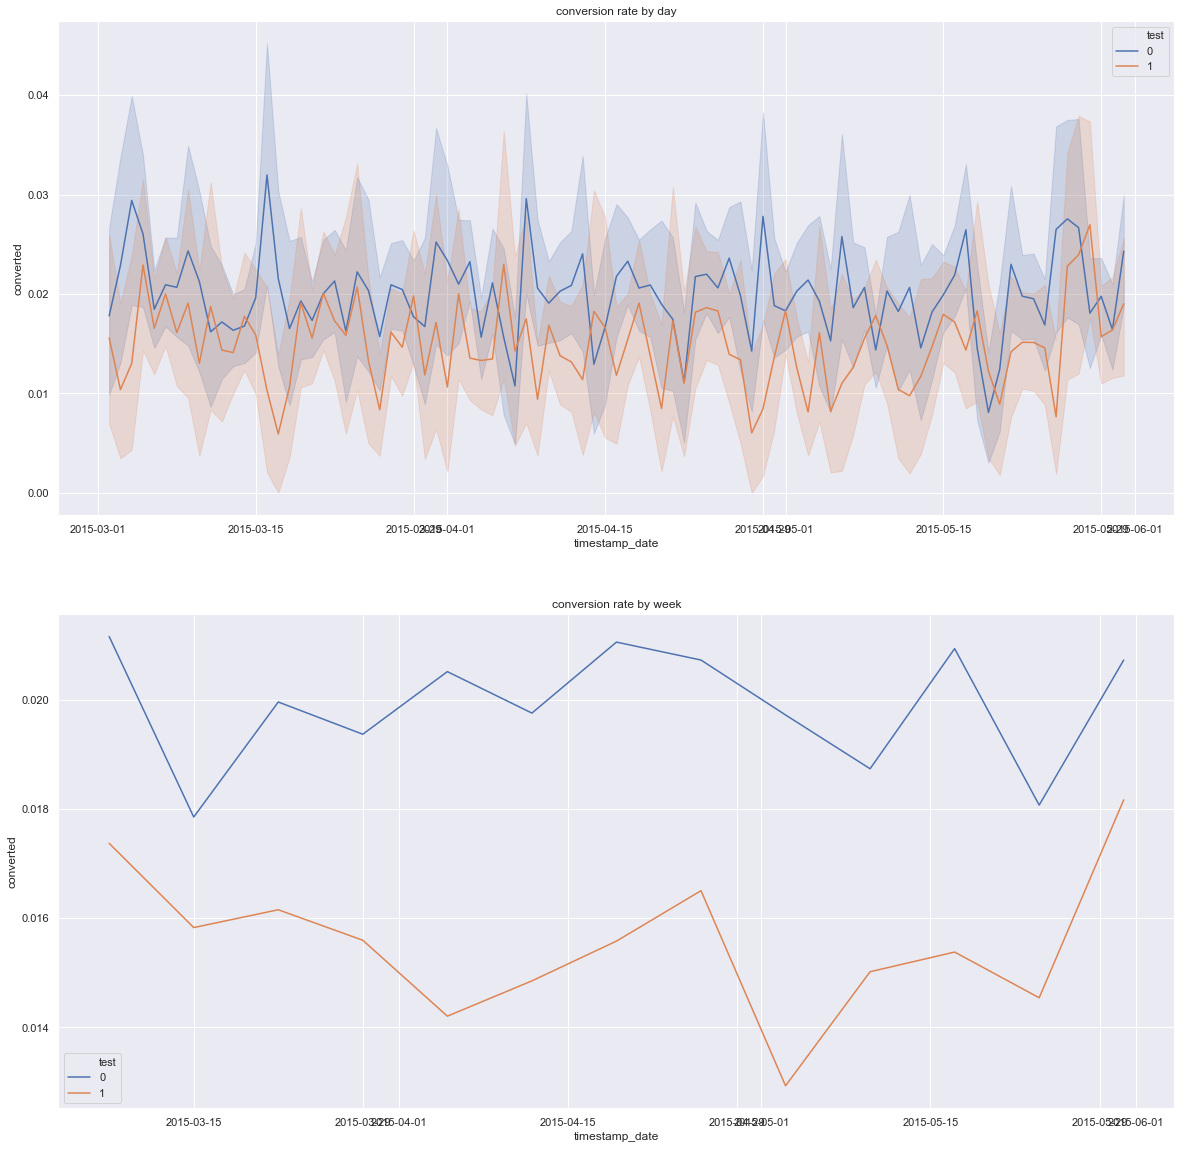

In [23]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20,20))
sns.lineplot('timestamp_date', 'converted', hue = 'test', data = df_final, ax = ax[0])
ax[0].set_title('conversion rate by day')

sns.lineplot('timestamp_date','converted', hue = 'test', data = groupby, ax= ax[1])
ax[1].set_title('conversion rate by week')

We can also looking at the test result at a weekly level with count:

In [24]:
df_final.set_index('timestamp_date').groupby(
    [pd.Grouper(freq = 'W'), 'test'])['converted'].agg(['mean','count']).reset_index()

,timestamp_date,test,mean,count
0,2015-03-08,0,0.021166,15638
1,2015-03-08,1,0.017375,9036
2,2015-03-15,0,0.017857,15792
3,2015-03-15,1,0.015830,8465
4,2015-03-22,0,0.019966,15727
5,2015-03-22,1,0.016157,8727
6,2015-03-29,0,0.019375,15329
7,2015-03-29,1,0.015598,9104
8,2015-04-05,0,0.020523,15641
9,2015-04-05,1,0.014206,8377


Looks still significant to me whereas most of the days whether group it by day or week, those who are not in test has a consistently higher conversion rate than those who are

## Conversion Rate breakdown by other demographics

Now let's look across conversion rate by other demographics and see if any of them would stand out:

### Categorical Values

In [25]:
def cat_plot(df, col_list, y, hue , figsize):
    for col in col_list:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = figsize)
        sns.countplot(x = col, hue = y, data = df, ax = ax[0])
        sns.barplot(x = col, y = y, data =df, hue = hue, ax=ax[1])
        ax[0].set_title('Count {} plot of {}'.format(y, col))
        ax[1].set_ylabel('Mean {} rate'.format(y))
        ax[1].set_title('Mean {} rate by {}'.format(y, col))

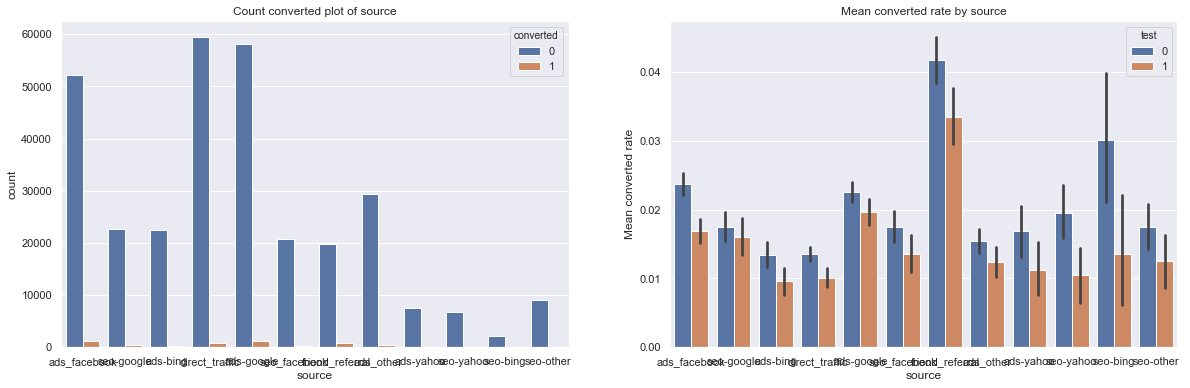

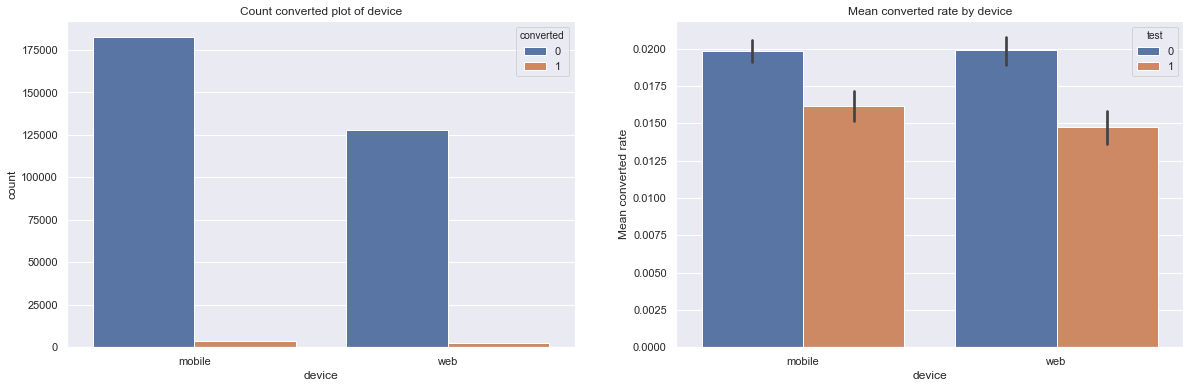

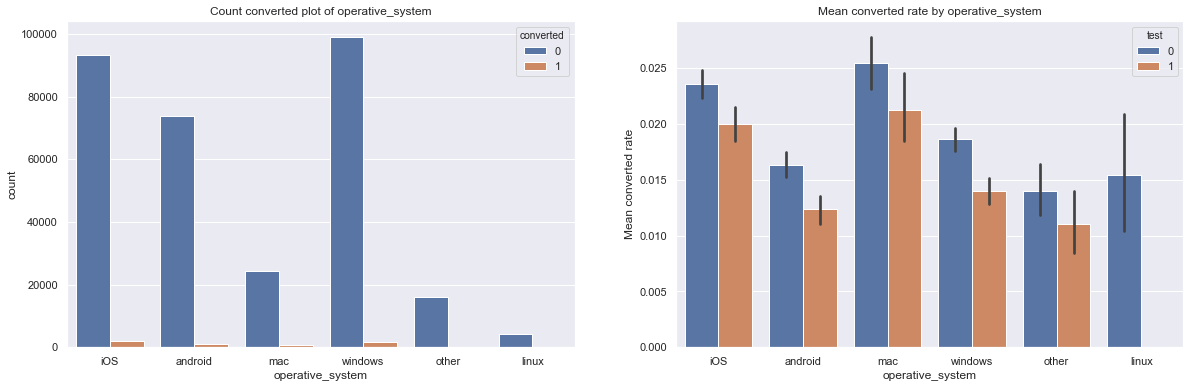

In [26]:
cat_plot(df = df_final, col_list = ['source', 'device','operative_system'], y = 'converted', 
         hue = 'test', figsize = (20,6))

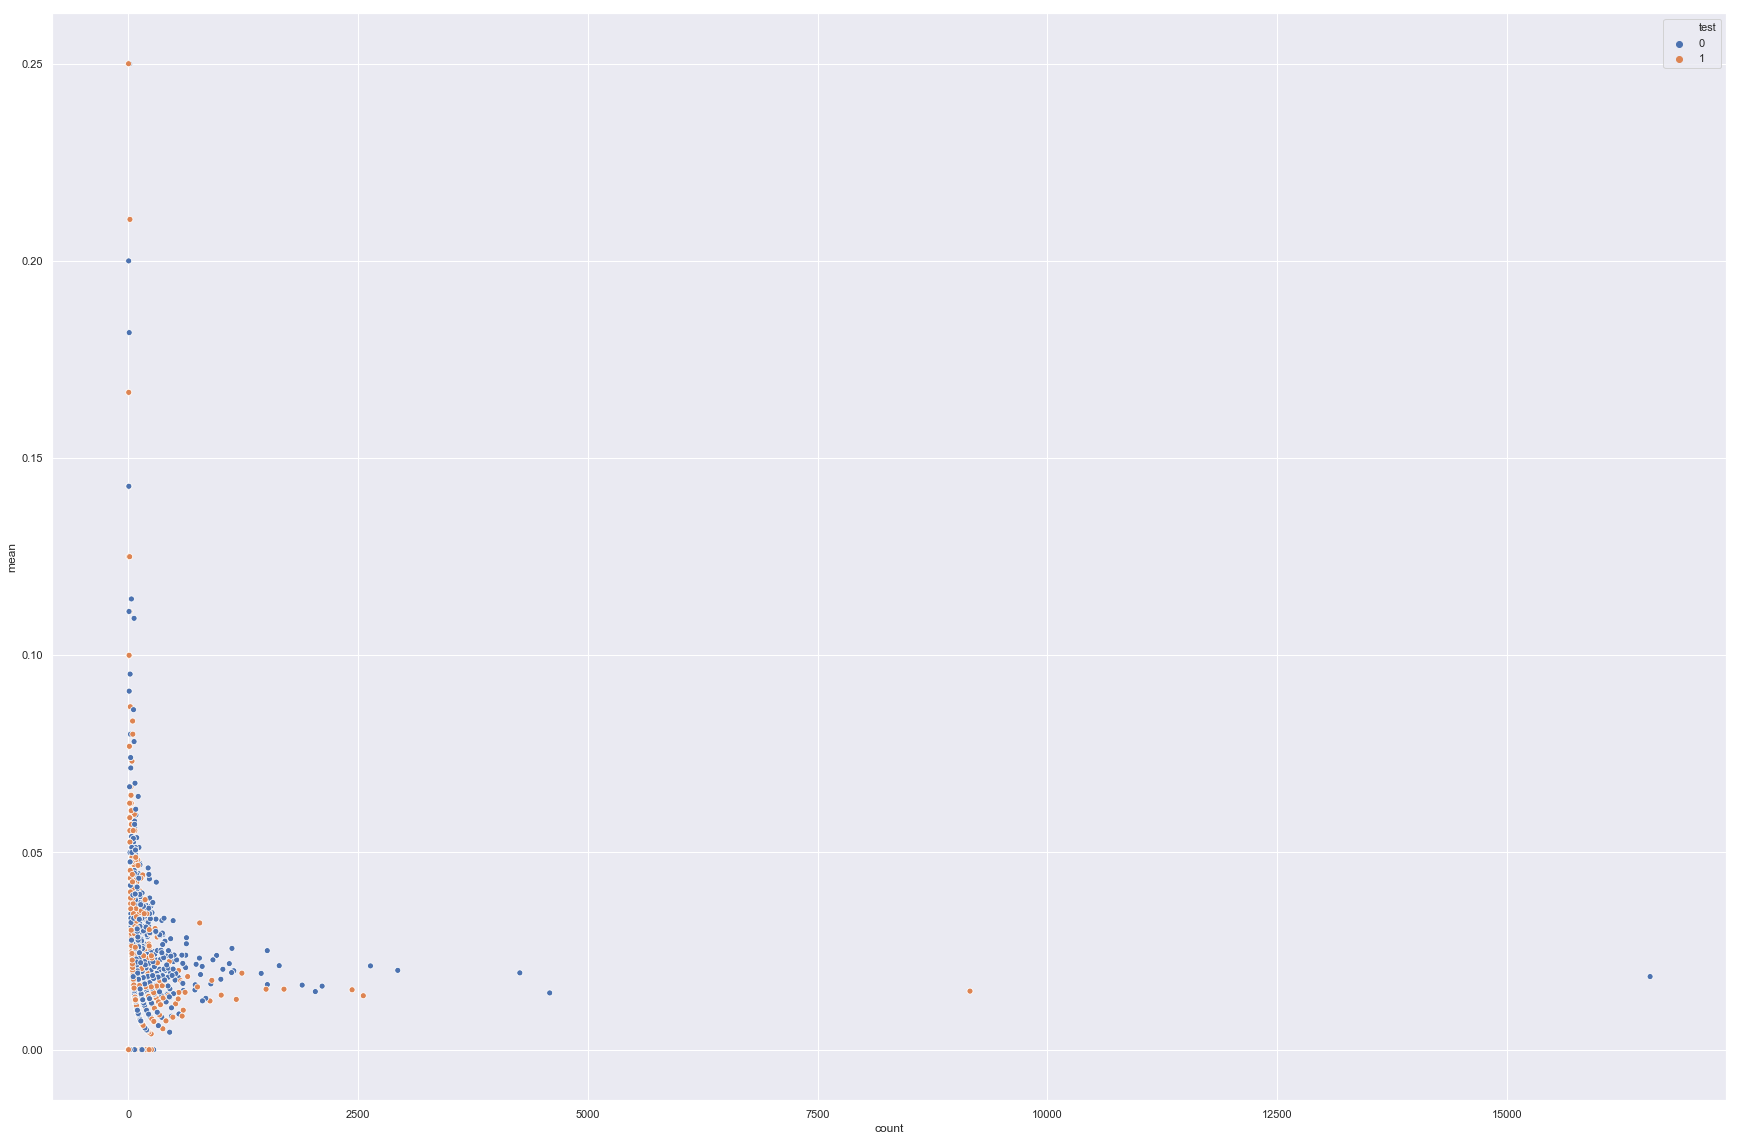

In [27]:
scatter_data = df_final.groupby(['city','test'])['converted'].agg(['mean','count']).reset_index()
f, ax = plt.subplots(figsize = (30,20))
sns.scatterplot(x = 'count', y = 'mean', hue = 'test', data = scatter_data)

In [28]:
scatter_data.sort_values(by = 'mean', ascending = False)[0:10]

,city,test,mean,count
268,Catonsville,0,0.250000,16
160,Bonita Springs,0,0.250000,4
1113,North Atlanta,1,0.250000,4
888,Lehigh Acres,1,0.210526,19
290,Chapel Hill,1,0.200000,5
1403,Saint Charles,0,0.200000,5
1211,Parkway-South Sacramento,0,0.181818,11
153,Blue Springs,1,0.166667,6
555,Findlay,1,0.166667,6
855,Lake Magdalene,0,0.142857,7


Looks like there are specific channel that stands out for conversion, namely `referral` &  `iOS` and `mac` users tend to have a higher conversion rate than other users; also there are a few cities that might have higher conversion rate than others but the vast majority of cities stays in the low range of conversion rate

### Numeric Values

In [29]:
def num_plot(df, col_list, y, figsize = (14,6), fitploy = 5):
    for col in col_list:
        # setting up figure and axes
        fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = figsize)

        # setting up 2nd graph's ploynomial regression 
        grouped_data = df[[col,y]].groupby(col).mean().reset_index()
        x= np.array(grouped_data[col])
        y= np.array(grouped_data[y])
        fit = np.polyfit(x,y, fitploy)
        fit_func = np.poly1d(fit)
        label_0 = '{} = 0'.format(y)
        label_1 = '{} = 1'.format(y)

        # plotting 1st graph
        sns.distplot(df[df[y] == 0][col], label = label_0, ax= ax[0])
        sns.distplot(df[df[y] == 1][col], label = label_1, ax= ax[0])
        ax[0].legend()
        ax[0].set_title('Kernel Density Plot of {} over {}'.format(col, y))
        ax[0].set_ylabel('Kernel Density')

        # plotting 2nd graph
        plt.plot(col, y, '.-',
                 data = df[[col, y]].groupby(col).mean().reset_index()
                )
        plt.plot(x, fit_func(x), '--')
        ax[1].legend(['Mean {} Rate'.format(y),'{} Rate Trend'.format(y)])
        ax[1].set_title('Mean {} Rate of {}'.format(y, col))
        ax[1].set_xlabel(col)
        ax[1].set_ylabel('Mean {} Rate'.format(y))

__This is not needed as it is lat & long info (geographic)__

# Build a model to predict conversion to validate our findings

Here we want to build a Random Forest Model real quick using H2O to verify our findings: 
- see if `referral` channel and `iOS` and `mac` users tend to get us a higher conversion predictions
- any additional insights we can find along the predictive model

## Initiate H2O instance

In [30]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.1" 2018-10-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.1+13-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.1+13-LTS, mixed mode)
  Starting server from /Users/yigongzhang/miniconda3/envs/python/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/cg/msv4ryrx4nj787spgb4ghfxh0000gn/T/tmp7tm28gtf
  JVM stdout: /var/folders/cg/msv4ryrx4nj787spgb4ghfxh0000gn/T/tmp7tm28gtf/h2o_yigongzhang_started_from_python.out
  JVM stderr: /var/folders/cg/msv4ryrx4nj787spgb4ghfxh0000gn/T/tmp7tm28gtf/h2o_yigongzhang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.1
H2O cluster version age:,23 days
H2O cluster name:,H2O_from_python_yigongzhang_38fzze
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


## Passing data in

In [31]:
df_final.columns

Index(['user_id', 'timestamp', 'source', 'device', 'operative_system', 'test',
       'price', 'converted', 'city', 'lat', 'long', 'timestamp_date'],
      dtype='object')

Before we do that, we need to interpret date as numeric features; separate into day and week:

In [32]:
df_final['ts_day'] = df_final.timestamp_date.apply(lambda x: x.day)
df_final['ts_week'] = df_final.timestamp_date.apply(lambda x: x.week)

df_final.columns

Index(['user_id', 'timestamp', 'source', 'device', 'operative_system', 'test',
       'price', 'converted', 'city', 'lat', 'long', 'timestamp_date', 'ts_day',
       'ts_week'],
      dtype='object')

Now let's load in data, we don't need `'user_id'`, `timestamp`, `price`, `city`, `timestamp_date`:

In [33]:
h2o_df = H2OFrame(df_final[
    ['source','device','operative_system','test','converted','lat','long','ts_day','ts_week']])

h2o_df[['source','device','operative_system','test','converted']] = h2o_df[
    ['source','device','operative_system','test','converted']].asfactor()

h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,source,device,operative_system,test,converted,lat,long,ts_day,ts_week
type,enum,enum,enum,enum,enum,real,real,int,int
mins,,,,,,19.7,-157.8,1.0,10.0
mean,,,,,,37.11200403931788,-93.98122509026723,15.880768562263896,15.984777284434438
maxs,,,,,,61.18,30.31,31.0,22.0
sigma,,,,,,5.209756133044819,18.086915836427718,8.773242121469336,3.7403022590367603
zeros,,,,,,0,0,0,0
missing,0,0,0,0,0,41141,41141,0,0
0,ads_facebook,mobile,iOS,0,0,42.89,-78.86,8.0,19.0
1,seo-google,mobile,android,0,0,44.68,-93.24,10.0,19.0
2,ads-bing,mobile,android,0,0,41.38,-81.73,4.0,14.0


## Test Train Split & Train Classifier

In [34]:
strat_split = h2o_df['converted'].stratified_split(test_frac = 0.25, seed = 123)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = [col for col in h2o_df.columns if col != 'converted']
target = 'converted'

model = H2ORandomForestEstimator(balance_classes = True, ntrees = 200, max_depth = 20, seed = 123, 
                                 score_each_iteration = True, nfolds = 5)
model.train(x = feature, y=target,  training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


## Model Performance

In [35]:
model.summary

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1548033090004_1


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.421404768193794
RMSE: 0.6491569672997387
LogLoss: 1.313276738914561
Mean Per-Class Error: 0.02287960617859497
AUC: 0.9952665875617401
pr_auc: 0.99409914223127
Gini: 0.9905331751234803
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.021665305077806094: 


,0,1,Error,Rate
0,224097.0,8878.0,0.0381,(8878.0/232975.0)
1,1802.0,231199.0,0.0077,(1802.0/233001.0)
Total,225899.0,240077.0,0.0229,(10680.0/465976.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0216653,0.9774244,336.0
max f2,0.0185690,0.9884521,340.0
max f0point5,0.0278454,0.9730536,327.0
max accuracy,0.0223024,0.9771211,335.0
max precision,0.5556789,1.0,0.0
max recall,0.0103302,1.0,356.0
max specificity,0.5556789,1.0,0.0
max absolute_mcc,0.0216653,0.9546010,336.0
max min_per_class_accuracy,0.0271714,0.9727481,328.0
max mean_per_class_accuracy,0.0223024,0.9771204,335.0


Gains/Lift Table: Avg response rate: 50.00 %, avg score:  4.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100005,0.1995537,1.9990301,1.9990301,0.9995708,0.2362275,0.9995708,0.2362275,0.0199913,0.0199913,99.9030091,99.9030091
,2,0.0200010,0.1757565,1.9994593,1.9992447,0.9997854,0.1862681,0.9996781,0.2112478,0.0199956,0.0399870,99.9459252,99.9244672
,3,0.0300015,0.1610253,1.9981718,1.9988870,0.9991416,0.1679077,0.9994993,0.1968011,0.0199827,0.0599697,99.8171770,99.8887038
,4,0.0400021,0.1502356,1.9986009,1.9988155,0.9993562,0.1554466,0.9994635,0.1864625,0.0199870,0.0799567,99.8600931,99.8815511
,5,0.0500004,0.1416694,1.9986007,1.9987725,0.9993561,0.1457833,0.9994420,0.1783281,0.0199827,0.0999395,99.8600654,99.8772547
,6,0.1000009,0.1143507,1.9976567,1.9982146,0.9988841,0.1265741,0.9991631,0.1524511,0.0998837,0.1998232,99.7656682,99.8214614
,7,0.1500013,0.0978686,1.9957683,1.9973992,0.9979398,0.1056099,0.9987553,0.1368374,0.0997893,0.2996124,99.5768294,99.7399174
,8,0.2000017,0.0849948,1.9902748,1.9956181,0.9951929,0.0912086,0.9978647,0.1254302,0.0995146,0.3991270,99.0274802,99.5618081
,9,0.3000004,0.0645803,1.9816479,1.9909614,0.9908792,0.0743556,0.9955363,0.1084056,0.1981622,0.5972893,98.1647913,99.0961425
,10,0.4000013,0.0465772,1.9591164,1.9830001,0.9796129,0.0556449,0.9915554,0.0952153,0.1959133,0.7932026,95.9116405,98.3000127




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.018178749743947693
RMSE: 0.134828593940409
LogLoss: 0.10443378976894185
Mean Per-Class Error: 0.4475874569070748
AUC: 0.5694681168400034
pr_auc: 0.02216147068835582
Gini: 0.13893623368000685
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.004651104954586357: 


,0,1,Error,Rate
0,143420.0,89555.0,0.3844,(89555.0/232975.0)
1,2269.0,2082.0,0.5215,(2269.0/4351.0)
Total,145689.0,91637.0,0.3869,(91824.0/237326.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0046511,0.0433804,317.0
max f2,0.0038418,0.0965846,330.0
max f0point5,0.0049267,0.0280745,312.0
max accuracy,0.2360538,0.9816624,0.0
max precision,0.1378635,0.1904762,11.0
max recall,0.0001704,1.0,399.0
max specificity,0.2360538,0.9999957,0.0
max absolute_mcc,0.0019892,0.0313107,368.0
max min_per_class_accuracy,0.0040555,0.5488400,326.0
max mean_per_class_accuracy,0.0038418,0.5524125,330.0


Gains/Lift Table: Avg response rate:  1.83 %, avg score:  0.57 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100031,0.0413063,1.4245156,1.4245156,0.0261163,0.0607966,0.0261163,0.0607966,0.0142496,0.0142496,42.4515605,42.4515605
,2,0.0200020,0.0303876,0.9883868,1.2064972,0.0181205,0.0354901,0.0221192,0.0481460,0.0098828,0.0241324,-1.1613162,20.6497159
,3,0.0300009,0.0228152,1.3331729,1.2487165,0.0244416,0.0263410,0.0228933,0.0408787,0.0133303,0.0374627,33.3172945,24.8716490
,4,0.0400040,0.0185079,1.3785635,1.2811851,0.0252738,0.0203962,0.0234885,0.0357570,0.0137899,0.0512526,37.8563489,28.1185078
,5,0.0500198,0.0161317,0.7572530,1.1762751,0.0138830,0.0172470,0.0215652,0.0320506,0.0075845,0.0588370,-24.2747014,17.6275080
,6,0.1000017,0.0109629,1.2369456,1.2065988,0.0226775,0.0130744,0.0221211,0.0225661,0.0618249,0.1206619,23.6945590,20.6598831
,7,0.1500004,0.0087223,1.2733027,1.2288328,0.0233440,0.0097360,0.0225287,0.0182895,0.0636635,0.1843254,27.3302704,22.8832831
,8,0.2000034,0.0073441,1.3053700,1.2479679,0.0239319,0.0079903,0.0228795,0.0157146,0.0652724,0.2495978,30.5370019,24.7967934
,9,0.3000008,0.0056042,1.1882626,1.2280667,0.0217849,0.0064014,0.0225147,0.0126103,0.1188233,0.3684211,18.8262631,22.8066726
,10,0.4000025,0.0044819,1.2433714,1.2318929,0.0227953,0.0050165,0.0225848,0.0107118,0.1243392,0.4927603,24.3371367,23.1892926



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.6636347,0.0656603,0.6614662,0.5481892,0.7718036,0.7633185,0.5733959
auc,0.5697022,0.0083859,0.5718048,0.5525049,0.5845996,0.5793168,0.5602848
err,0.3363653,0.0656603,0.3385338,0.4518108,0.2281964,0.2366815,0.4266042
err_count,15960.2,3103.0085,16079.0,21433.0,10882.0,11209.0,20198.0
f0point5,0.0287061,0.0008780,0.0286139,0.0279076,0.0291488,0.0307696,0.0270908
f1,0.0439727,0.0010200,0.0439979,0.0432978,0.0440970,0.0464483,0.0420224
f2,0.0941080,0.0014311,0.0951597,0.0965328,0.0905157,0.0947062,0.0936258
lift_top_group,1.46617,0.1231720,1.487289,1.5335513,1.3269644,1.2404611,1.7425838
logloss,0.1044404,0.0025829,0.1047961,0.1092418,0.0983299,0.1066111,0.1032228
max_per_class_error,0.5826778,0.0697405,0.576659,0.4646799,0.6964933,0.6918736,0.483683


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-01-20 19:34:44,23 min 5.405 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-01-20 19:34:45,23 min 5.831 sec,1.0,0.5491760,1.1297515,0.9293678,0.6691222,1.9561799,0.1644081
,2019-01-20 19:34:45,23 min 6.125 sec,2.0,0.5809016,1.2252093,0.9237850,0.7378932,1.9604531,0.1690040
,2019-01-20 19:34:45,23 min 6.363 sec,3.0,0.5812121,1.1972139,0.9406019,0.7679012,1.9632385,0.1375251
,2019-01-20 19:34:45,23 min 6.595 sec,4.0,0.5938909,1.2332395,0.9457803,0.8024684,1.9654734,0.1288453
---,---,---,---,---,---,---,---,---,---
,2019-01-20 19:35:27,23 min 48.099 sec,196.0,0.6490954,1.3127682,0.9952786,0.9941147,1.9990301,0.0227930
,2019-01-20 19:35:27,23 min 48.303 sec,197.0,0.6491508,1.3132353,0.9952700,0.9941029,1.9990301,0.0228316
,2019-01-20 19:35:27,23 min 48.526 sec,198.0,0.6491168,1.3128795,0.9952758,0.9941107,1.9990301,0.0228724
,2019-01-20 19:35:27,23 min 48.732 sec,199.0,0.6491700,1.3134069,0.9952642,0.9940973,1.9990301,0.0228381



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
lat,2023044.2500000,1.0,0.2291890
ts_day,1847715.8750000,0.9133344,0.2093262
long,1754633.6250000,0.8673234,0.1987810
source,1482265.5,0.7326906,0.1679247
ts_week,939266.1250000,0.4642835,0.1064087
operative_system,505853.3437500,0.2500456,0.0573077
test,153494.0937500,0.0758728,0.0173892
device,120694.8125000,0.0596600,0.0136734


<bound method ModelBase.summary of >

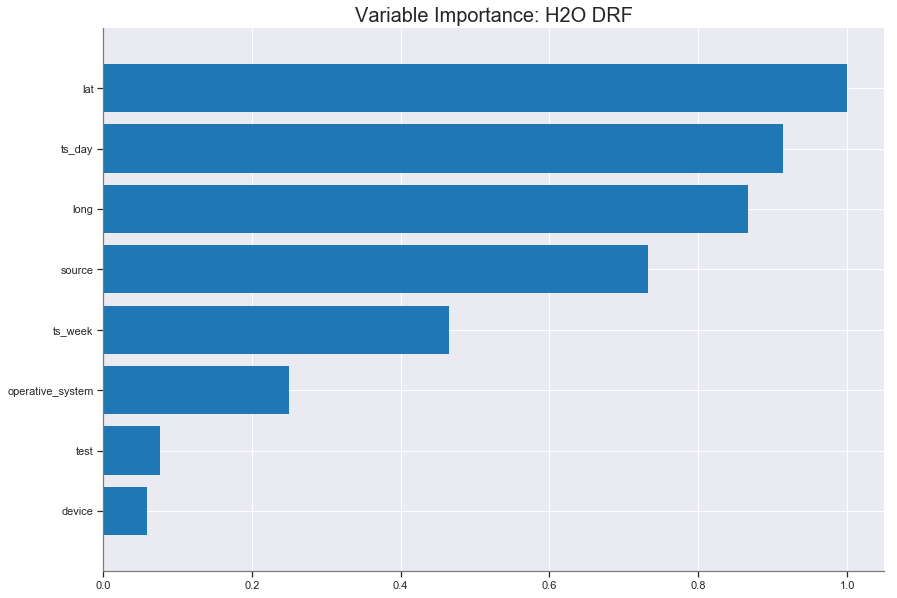

In [36]:
model.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model DRF_model_python_1548033090004_1 on column 'source'



source,mean_response,stddev_response,std_error_mean_response
ads-bing,0.0040443,0.0059998,0.0000123
ads-google,0.0088319,0.0097847,0.0000201
ads-yahoo,0.0035319,0.0054605,0.0000112
ads_facebook,0.0088158,0.0097250,0.0000200
ads_other,0.0052015,0.0070832,0.0000145
direct_traffic,0.0053941,0.0072886,0.0000150
friend_referral,0.0108188,0.0155227,0.0000319
seo-bing,0.0047693,0.0067285,0.0000138
seo-google,0.0055047,0.0071981,0.0000148
seo-other,0.0040723,0.0064055,0.0000131


PartialDependence: Partial Dependence Plot of model DRF_model_python_1548033090004_1 on column 'device'



device,mean_response,stddev_response,std_error_mean_response
mobile,0.0067659,0.0108972,0.0000224
web,0.0059296,0.0097489,0.0000200


PartialDependence: Partial Dependence Plot of model DRF_model_python_1548033090004_1 on column 'operative_system'



operative_system,mean_response,stddev_response,std_error_mean_response
android,0.0051061,0.0076121,0.0000156
iOS,0.0078864,0.0099251,0.0000204
linux,0.0027055,0.0039279,0.0000081
mac,0.0062520,0.0082437,0.0000169
other,0.0029188,0.0053350,0.0000110
windows,0.0061790,0.0081445,0.0000167


PartialDependence: Partial Dependence Plot of model DRF_model_python_1548033090004_1 on column 'test'



test,mean_response,stddev_response,std_error_mean_response
0,0.0079687,0.0120769,0.0000248
1,0.0052929,0.0102374,0.0000210


PartialDependence: Partial Dependence Plot of model DRF_model_python_1548033090004_1 on column 'lat'



lat,mean_response,stddev_response,std_error_mean_response
19.7,0.0038468,0.0030504,0.0000063
21.8831579,0.0037122,0.0031041,0.0000064
24.0663158,0.0037366,0.0033139,0.0000068
26.2494737,0.0040464,0.0038345,0.0000079
28.4326316,0.0045238,0.0039518,0.0000081
30.6157895,0.0045849,0.0037283,0.0000077
32.7989474,0.0048862,0.0041378,0.0000085
34.9821053,0.0053736,0.0044825,0.0000092
37.1652632,0.0055466,0.0043742,0.0000090
39.3484211,0.0055708,0.0044120,0.0000091


PartialDependence: Partial Dependence Plot of model DRF_model_python_1548033090004_1 on column 'long'



long,mean_response,stddev_response,std_error_mean_response
-157.8,0.0038846,0.0032006,0.0000066
-147.8994737,0.0038677,0.0032004,0.0000066
-137.9989474,0.0038329,0.0030861,0.0000063
-128.0984211,0.0039619,0.0032884,0.0000068
-118.1978947,0.0049802,0.0042139,0.0000086
-108.2973684,0.0048857,0.0038763,0.0000080
-98.3968421,0.0054698,0.0048391,0.0000099
-88.4963158,0.0055991,0.0048215,0.0000099
-78.5957895,0.0051527,0.0044725,0.0000092
-68.6952632,0.0039753,0.0029370,0.0000060


PartialDependence: Partial Dependence Plot of model DRF_model_python_1548033090004_1 on column 'ts_day'



ts_day,mean_response,stddev_response,std_error_mean_response
1.0,0.0045224,0.0056464,0.0000116
2.5789474,0.0052607,0.0060089,0.0000123
4.1578947,0.0051700,0.0056077,0.0000115
5.7368421,0.0056366,0.0058552,0.0000120
7.3157895,0.0055357,0.0056438,0.0000116
8.8947368,0.0057067,0.0054671,0.0000112
10.4736842,0.0060329,0.0061625,0.0000126
12.0526316,0.0060103,0.0062319,0.0000128
13.6315789,0.0060324,0.0059673,0.0000122
15.2105263,0.0065691,0.0064130,0.0000132


PartialDependence: Partial Dependence Plot of model DRF_model_python_1548033090004_1 on column 'ts_week'



ts_week,mean_response,stddev_response,std_error_mean_response
10.0,0.0051625,0.0068962,0.0000142
11.0,0.0056336,0.0063890,0.0000131
12.0,0.0059693,0.0065852,0.0000135
13.0,0.0062527,0.0069486,0.0000143
14.0,0.0062802,0.0070352,0.0000144
15.0,0.0063938,0.0068383,0.0000140
16.0,0.0064903,0.0067527,0.0000139
17.0,0.0063446,0.0066694,0.0000137
18.0,0.0060789,0.0066410,0.0000136
19.0,0.0061044,0.0067302,0.0000138


[, , , , , , , ]

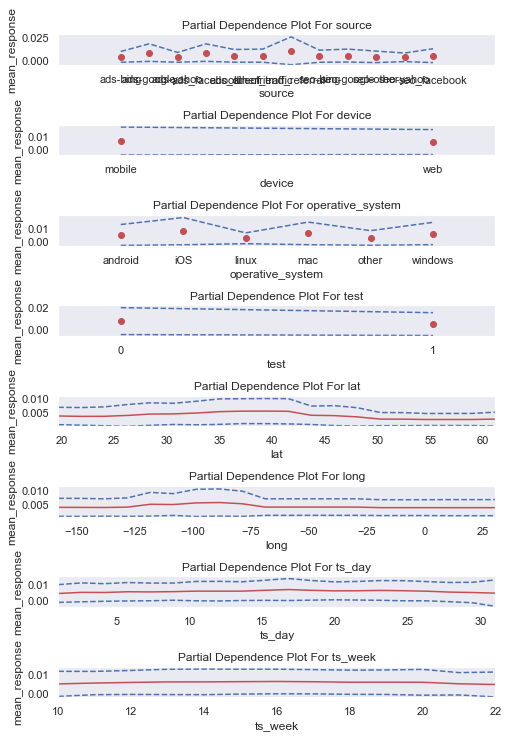

In [37]:
model.partial_plot(train, cols = feature)

This actually helps to verify if our previous analysis results

# Recommendation & Summary

Based on what we've seen by breaking down analysis and creating a ML model to predict conversion, I would recommend the following:
- if the question is simply whether to sell the software at higher price or not; i would recommend against it -- as we have seen that from the test, the conversion rate in test is mostly lower & significant if we break it down by week  & the overall conversion rate in test is lower than those who are not in test set
- apart from that, we don't know the ramification of increasing price of software without adding additional features; though customers showed a willingness to pay -- even though the decrease in conversion rate can for sure compensate for increase in customers in this case. In other words, if the short term goal is to boost revenue, based on result of this test, yes -- it can increase revenue in the short term; however, we don't know what's the long term value of this action -- if increasing price would potentially turn away some future customers & how much value those customers would bring to us

Actionable insights from data:
- Referral helps to boost conversion rate significantly
- both `iOS` and `mac` users have higher conversion rate than other platforms

These are the areas that the company can focus their marketing efforts on to grow conversion